In [1]:
import os
import glob
import random
import time
import math
import string
import unicodedata

import torch
from torch import nn
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
!wget https://download.pytorch.org/tutorial/data.zip
!unzip -q data.zip

--2023-09-14 14:56:05--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.239.83.69, 18.239.83.126, 18.239.83.16, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.239.83.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.04s   

2023-09-14 14:56:06 (63.7 MB/s) - ‘data.zip’ saved [2882130/2882130]



In [3]:
DATASET_PATH = "data/names"
FILES_LIST = glob.glob("data/names/*")
FILES_LIST

['data/names/Chinese.txt',
 'data/names/English.txt',
 'data/names/Japanese.txt',
 'data/names/Spanish.txt',
 'data/names/German.txt',
 'data/names/Greek.txt',
 'data/names/Dutch.txt',
 'data/names/Portuguese.txt',
 'data/names/Polish.txt',
 'data/names/Korean.txt',
 'data/names/Russian.txt',
 'data/names/Czech.txt',
 'data/names/Scottish.txt',
 'data/names/French.txt',
 'data/names/Vietnamese.txt',
 'data/names/Arabic.txt',
 'data/names/Irish.txt',
 'data/names/Italian.txt']

In [4]:
all_letters = string.ascii_letters + " .,;'"
N_LETTERS = len(all_letters)

print("Total valid ascii letters: %s" %N_LETTERS)
print("Valid letters : %s" %all_letters)

Total valid ascii letters: 57
Valid letters : abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'


# **unicode_to_ascii**
1. `unicodedata.normalize("NFD", string)`: This uses the `normalize` function from the `unicodedata` module to apply the Normal Form D (NFD) decomposition to the input `string`. NFD decomposes characters with diacritics into their base character and combining diacritics.

2. `c for c in ...`: This is a list comprehension. It iterates over each character `c` in the result of the NFD decomposition.

3. `if unicodedata.category(c) != "Mn" and c in all_letters`: This is a conditional statement that filters the characters. It checks two conditions:
   - `unicodedata.category(c) != "Mn"`: This checks if the character `c` is not in the "Mark, Nonspacing" category. This category typically includes diacritics or combining characters.
   - `c in all_letters`: This checks if the character `c` is in a collection called `all_letters`. This collection likely contains all the valid letters.

4. `"".join(...)`: This combines the filtered characters back into a string. It joins each character with an empty string, effectively concatenating them.

In [5]:
def unicode_to_ascii(string):
  """Normal form D (NFD) is also known as canonical decomposition, and translates each character into its decomposed form.
  Args:
    sring: str -> string of unicode data of different language
  Return:
    string: str -> converted string
  """
  return "".join(
      c for c in unicodedata.normalize("NFD", string)
      if unicodedata.category(c) != "Mn" and c in all_letters
  )


In [6]:
all_categories = []
category_lines = {}
if os.path.exists(DATASET_PATH) and os.path.isdir(DATASET_PATH):
  file_list = os.listdir(DATASET_PATH)
  all_categories = [category.replace(".txt", "")
                      for category in file_list]

N_CATEGORIES = len(all_categories)

## **Read file**

In [7]:
def read_lines(filename: str):
  '''Read filename
  Args:
    filename: Path -> path of file
  Return:
    List: list -> list of string that is converted in ascii
  '''
  with open(filename, encoding="utf-8") as fp:
    lines = fp.read().strip().split('\n')
  return [unicode_to_ascii(line) for line in lines]

In [8]:
all_categories = []
for filename in FILES_LIST:
  category = os.path.splitext(os.path.basename(filename))[0]
  all_categories.append(category)
  lines = read_lines(filename)
  category_lines[category] = lines

print("total number of categories %s" % len(all_categories))

total number of categories 18


In [9]:
print(category_lines["Greek"][:5])

['Adamidis', 'Adamou', 'Agelakos', 'Akrivopoulos', 'Alexandropoulos']


In [10]:
def letter_to_index(letter):
  '''Convert Letter to index
  Args:
    letter: char -> letter
  Return:
    index: int -> gives index of letter from index
  '''
  return all_letters.find(letter)

def letter_to_tensor(letter):
  tensor = torch.zeros(1, N_LETTERS)
  tensor[0][letter_to_index(letter)] = 1
  return tensor

letter_to_index("q")

16

In [11]:
def line_to_tensor(line):
  tensor = torch.zeros(len(line), 1, N_LETTERS)
  for li, letter in enumerate(line):
    tensor[li][0][letter_to_index(letter)] = 1
  return tensor

q = line_to_tensor("Tthisaaa is it")
q

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [12]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()

    self.hidden_size = hidden_size
    self.layer1 = nn.Linear(input_size + hidden_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):
    combined = torch.cat((input, hidden), 1)
    hidden = self.layer1(combined)
    output = self.layer2(hidden)
    output = self.softmax(output)
    return output, hidden

  def initHidden(self):
    return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(N_LETTERS, n_hidden, N_CATEGORIES)

In [13]:
input  = letter_to_tensor("A")
hidden = torch.zeros(1, n_hidden)

output, next = rnn(input, hidden)

In [14]:
def category_from_output(output):
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  return all_categories[category_i], category_i

print(category_from_output(output))

('Greek', 5)


In [15]:
def random_choice(L):
  return L[random.randint(0, len(L) -1)]


In [16]:
def random_training_example():
  # select one random category of language. -> str
  category = random_choice(all_categories)
  # select one line(Name) from choosen category randomly ->str
  line = random_choice(category_lines[category])

  # convert category to label -> long required for operation
  category_tensor = torch.tensor([all_categories.index(category)],
                                 dtype=torch.long)
  line_tensor = line_to_tensor(line)
  return category, line, category_tensor, line_tensor


In [17]:
category, line, category_tensor, line_tensor = random_training_example()
print(f"category: {category} / line: {line} \n\
/ category_tensor: \n / line_tensor: {line_tensor.shape}")

category: German / line: Strand 
/ category_tensor: 
 / line_tensor: torch.Size([6, 1, 57])


In [18]:
category_tensor

tensor([4])

In [19]:
line_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [20]:
all_categories

['Chinese',
 'English',
 'Japanese',
 'Spanish',
 'German',
 'Greek',
 'Dutch',
 'Portuguese',
 'Polish',
 'Korean',
 'Russian',
 'Czech',
 'Scottish',
 'French',
 'Vietnamese',
 'Arabic',
 'Irish',
 'Italian']

In [21]:
def time_since(prev_time):
  """Return time in minutes and seconds for difference bewteen time
  Args:
    prev_time: `time.time()` -> previous time
  Return:
    m, s: int -> in minute and seconds
  """
  now = time.time()
  s = now - prev_time
  m = math.floor(s / 60)
  s -= m*60
  return m, s

# NLLLoss
The negative log likelihood loss. It is useful to train a classification problem with C classes.

The input given through a forward call is expected to contain log-probabilities of each class. input has to be a Tensor of size either
(minibatch,C) or
(minibatch,C,d1
​
 ,d2
​
 ,...,dK
​
 ) with
K≥1 for the K-dimensional case. The latter is useful for higher dimension inputs, such as computing NLL loss per-pixel for 2D images.

In [22]:
learning_rate = 0.005
loss_fn = nn.NLLLoss()

def train(category_tensor, line_tensor):
  hidden = rnn.initHidden()

  rnn.zero_grad()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)
  loss = loss_fn(output, category_tensor)
  loss.backward()

  for p in rnn.parameters():
    p.data.add_(p.grad.data, alpha=-learning_rate)

  return output, loss.item()

In [23]:
n_iters = 200000
print_every = 10000
plot_every = 2000

# Track the loss
current_loss = 0
all_losses = []

start = time.time()

for iter in range(1, n_iters + 1):
  category, line, category_tensor, line_tensor = random_training_example()
  output, loss = train(category_tensor, line_tensor)
  current_loss += loss

  if iter % print_every == 0:
    guess, guess_i = category_from_output(output)
    correct = "✓" if guess == category else f"✗ ({category})"
    time_percent = iter / n_iters * 100
    time_since_start = time_since(start)
    print(f"{iter} | {time_percent:.2f}% | ({time_since_start[0]:.2f}s, {time_since_start[1]:.2f}s) \
    | {loss:.4f} | {line} | {guess} | {correct}")

  if iter % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0


10000 | 5.00% | (0.00s, 21.39s)     | 2.3082 | Rodriguez | Dutch | ✗ (Spanish)
20000 | 10.00% | (0.00s, 36.68s)     | 3.0866 | Lucas | Greek | ✗ (Dutch)
30000 | 15.00% | (0.00s, 49.21s)     | 0.2011 | Slaski | Polish | ✓
40000 | 20.00% | (1.00s, 1.70s)     | 0.1518 | Sklavenitis | Greek | ✓
50000 | 25.00% | (1.00s, 14.22s)     | 2.5186 | Tomes | Dutch | ✗ (English)
60000 | 30.00% | (1.00s, 26.84s)     | 5.1906 | Turulo | Portuguese | ✗ (Russian)
70000 | 35.00% | (1.00s, 40.95s)     | 0.2744 | Maalouf | Arabic | ✓
80000 | 40.00% | (1.00s, 53.48s)     | 0.9510 | Finn | Irish | ✓
90000 | 45.00% | (2.00s, 6.07s)     | 1.5619 | Chung | Korean | ✗ (Vietnamese)
100000 | 50.00% | (2.00s, 18.58s)     | 6.3777 | Power | Czech | ✗ (Irish)
110000 | 55.00% | (2.00s, 31.15s)     | 3.6393 | Haik | Korean | ✗ (Arabic)
120000 | 60.00% | (2.00s, 43.55s)     | 0.2822 | Samaha | Arabic | ✓
130000 | 65.00% | (2.00s, 55.93s)     | 0.9250 | Schoorl | Dutch | ✓
140000 | 70.00% | (3.00s, 8.31s)     | 0.1524 | 

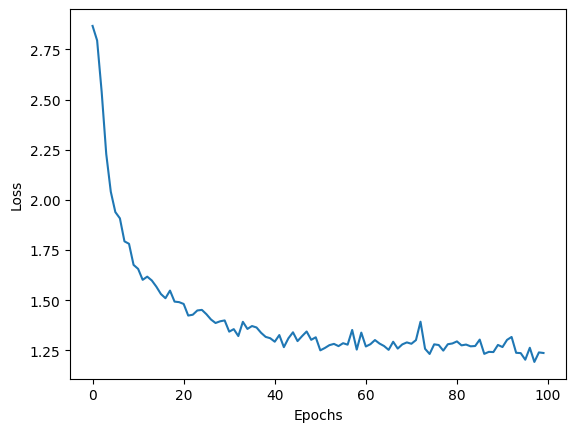

In [24]:
plt.figure()
plt.plot(all_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [25]:
confusion = torch.zeros(N_CATEGORIES, N_CATEGORIES)
n_confusion = 10000

def evaluate(line_tensor):
  hidden = rnn.initHidden()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  return output

In [26]:
for i in range(n_confusion):
  category, line, category_tensor, line_tensor = random_training_example()
  output = evaluate(line_tensor)
  guess, guess_i = category_from_output(output)
  category_i = all_categories.index(category)
  confusion[category_i][guess_i] += 1

<Axes: >

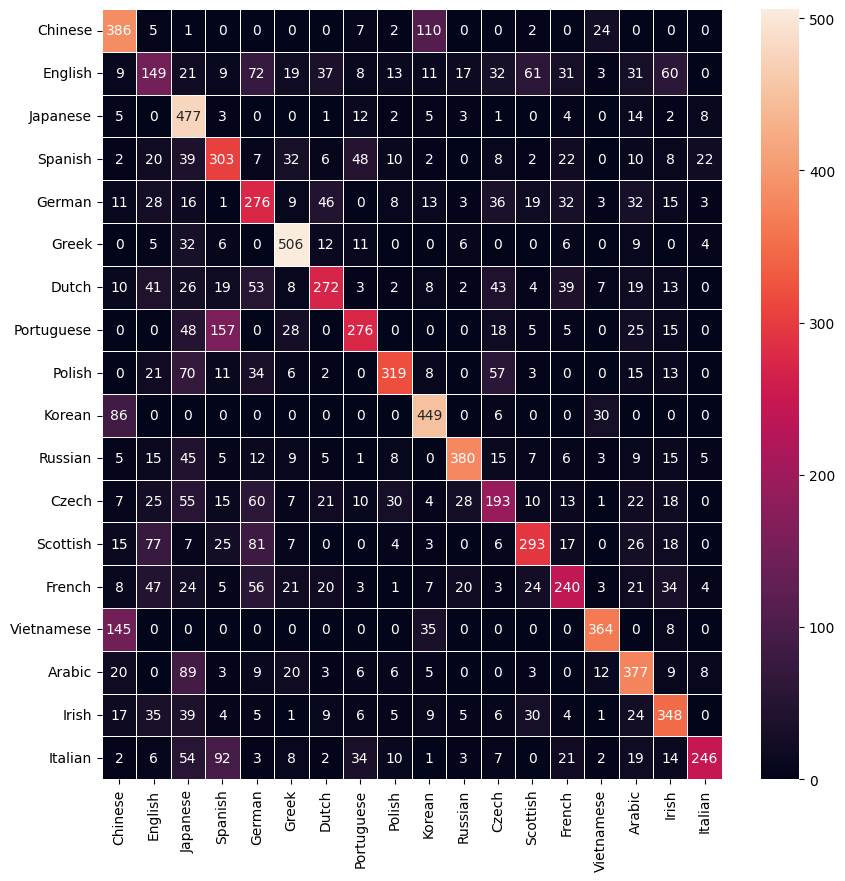

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=confusion.numpy(),
            xticklabels=all_categories,
            yticklabels=all_categories,
            annot=True,
            fmt=".0f",
            linewidth=.5)